In [ ]:
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [ ]:
!nvidia-smi

Tue Sep  8 03:43:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install --ignore-installed --upgrade -qq tensorflow

     |████████████████████████████████| 320.4MB 48kB/s 
     |████████████████████████████████| 2.9MB 52.5MB/s 
     |████████████████████████████████| 26.1MB 118kB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 6.8MB 55.3MB/s 
     |████████████████████████████████| 133kB 64.7MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 460kB 55.9MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 71kB 11.4MB/s 
     |████████████████████████████████| 1.3MB 48.2MB/s 
     |████████████████████████████████| 3.4MB 47.3MB/s 
     |████████████████████████████████| 102kB 14.1MB/s 
     |████████████████████████████████| 788kB 50.8MB/s 
     |████████████████████████████████| 307kB 60.9MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 788kB 48.8MB/s 
     |████████████████████████████████| 92kB 9.9MB/s 


In [ ]:
import numpy as np 
import pandas as pd 
from glob import glob
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip  '/content/drive/My Drive/Kaggle_Fruits_360/5857_1166105_bundle_archive.zip' -d '/content/drive/My Drive/Kaggle_Fruits_360'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: /content/drive/My Drive/Kaggle_Fruits_360/fruits-360/T

In [ ]:
for files in os.listdir('/content/drive/My Drive/Kaggle_Fruits_360/fruits-360'):
    print(os.path.join('/content/drive/My Drive/Kaggle_Fruits_360/fruits-360',files))

/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/LICENSE
/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Test
/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training
/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/papers
/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/readme.md
/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/test-multiple_fruits


In [ ]:
IMAGE_SIZE = [224,224]
train_path = '/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training'
test_path = '/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Test'
mixed_path = '/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/test-multiple_fruits'

In [ ]:
inception_v3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
for layers in inception_v3.layers:
    layers.trainable=False

In [ ]:
folders = glob('/content/drive/My Drive/Kaggle_Fruits_360/fruits-360/Training/*')
print(len(folders))

131


In [ ]:
x = Flatten()(inception_v3.output)
# x1 = Flatten()(x)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception_v3.input, outputs=prediction)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
img,label = train_generator.next()

(224, 224, 3)


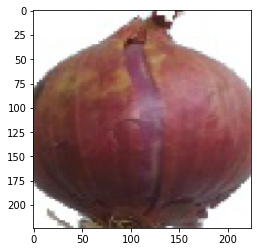

In [ ]:
for i in img:
    plt.imshow(i)
    print(i.shape)
    break

In [ ]:
history = model.fit_generator(
train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/10
2116/2116 [==============================] - 979s 463ms/step - loss: 0.6518 - accuracy: 0.9830 - val_loss: 5.3234 - val_accuracy: 0.9253
Epoch 2/10
2116/2116 [==============================] - 968s 458ms/step - loss: 0.5618 - accuracy: 0.9863 - val_loss: 6.2539 - val_accuracy: 0.9268
Epoch 3/10
2116/2116 [==============================] - 981s 464ms/step - loss: 0.4592 - accuracy: 0.9892 - val_loss: 4.8340 - val_accuracy: 0.9439
Epoch 4/10
2116/2116 [==============================] - 998s 472ms/step - loss: 0.4591 - accuracy: 0.9911 - val_loss: 6.1454 - val_accuracy: 0.9304
Epoch 5/10
2116/2116 [==============================] - 941s 445ms/step - loss: 0.3886 - accuracy: 0.9922 - val_loss: 7.3753 - val_accuracy: 0.9282
Epoch 6/10
2116/2116 [==============================] - 923s 436ms/step - loss: 0.3403 - accuracy: 0.9930 - val_loss: 6.4363 - val_accuracy: 0.9447
Epoch 7/10
2116/2116 [==============================] - 933s 441ms/step - loss: 0.2881 - accuracy: 0.9942 - val_

In [ ]:
model.save('inception_v3.h5')